# #  1、导入所需包

In [6]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  #pandas自带的图形包
import os
from pyecharts.charts import Pie, Map, Bar, Line, Grid, Page #插件可以绘制很酷炫的图形
from pyecharts import options as opts 
# matplotlib可以正常显示汉字
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [7]:
#2、导入数据
df_all=pd.read_csv(r'Z:\大四\python\大三\week10\北京二手房数据.csv')
df_all.head()

,title,detailUrl,position,houseInfo,followInfo,tagInfo,totalPrice,unitPrice,county
0,立水桥 北京北小区 视野特别好 税费也少,https://bj.lianjia.com/ershoufang/101103274797...,"['北京北 ', '立水桥']",2室1厅 | 81.49平米 | 东南 | 简装 | 中楼层(共20层) | 2008年建 ...,271人关注 / 一年前发布,"['近地铁', 'VR看装修', '房本满五年']","['455', '万']",单价55836元/平米,昌平
1,南北通透 全明格局 品质住宅 楼层高 观森林公园,https://bj.lianjia.com/ershoufang/101104923604...,"['招商嘉铭珑原 ', '立水桥']",3室1厅 | 175.91平米 | 南 北 | 精装 | 高楼层(共14层) | 2012年...,150人关注 / 一年前发布,"['VR看装修', '房本满两年']","['1250', '万']",单价71060元/平米,昌平
2,此房满五年唯一，有电梯，周边配套齐全,https://bj.lianjia.com/ershoufang/101108510562...,"['南环里 ', '鼓楼大街']",1室0厅 | 36.3平米 | 西 | 简装 | 高楼层(共10层) | 2004年建 | ...,15人关注 / 15天以前发布,"['VR房源', '房本满五年']","['165', '万']",单价45455元/平米,昌平
3,玫瑰园别墅，联排西边户，小区环境好,https://bj.lianjia.com/ershoufang/101108623996...,"['玫瑰园 ', '沙河']",5室2厅 | 245.6平米 | 南 北 | 精装 | 底层(共3层) | 2000年建 | 板楼,19人关注 / 5天以前发布,"['VR房源', '房本满五年', '随时看房']","['1150', '万']",单价46825元/平米,昌平
4,急售！南北通透 全明格局三居一层带花园100平看房方便,https://bj.lianjia.com/ershoufang/101108633440...,"['蓬莱公寓东区 ', '北七家']",3室2厅 | 145.14平米 | 南 北 西 | 精装 | 底层(共6层) | 2001年...,11人关注 / 5天以前发布,"['VR房源', '房本满五年']","['515', '万']",单价35483元/平米,昌平


In [8]:
#3、查看每列信息
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33556 entries, 0 to 33555
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       33556 non-null  object
 1   detailUrl   33556 non-null  object
 2   position    33556 non-null  object
 3   houseInfo   33556 non-null  object
 4   followInfo  33556 non-null  object
 5   tagInfo     33556 non-null  object
 6   totalPrice  33556 non-null  object
 7   unitPrice   33556 non-null  object
 8   county      33556 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


In [9]:
df_all.houseInfo   

0        2室1厅 | 81.49平米 | 东南 | 简装 | 中楼层(共20层) | 2008年建 ...
1        3室1厅 | 175.91平米 | 南 北 | 精装 | 高楼层(共14层) | 2012年...
2        1室0厅 | 36.3平米 | 西 | 简装 | 高楼层(共10层) | 2004年建 | ...
3        5室2厅 | 245.6平米 | 南 北 | 精装 | 底层(共3层) | 2000年建 | 板楼
4        3室2厅 | 145.14平米 | 南 北 西 | 精装 | 底层(共6层) | 2001年...
                               ...                        
33551    3室1厅 | 90.46平米 | 南 北 | 其他 | 低楼层(共7层) | 1990年建 ...
33552    3室2厅 | 151.24平米 | 东 西 | 精装 | 低楼层(共13层) | 2009年...
33553    2室1厅 | 53.2平米 | 东 西 | 简装 | 地下室(共6层) | 1987年建 | 板楼
33554    3室2厅 | 169.36平米 | 东南 | 精装 | 中楼层(共14层) | 2003年建...
33555    3室2厅 | 138.66平米 | 东南 | 精装 | 高楼层(共19层) | 2001年建...
Name: houseInfo, Length: 33556, dtype: object

##  4、数据预处理 

### 4.1 初步处理

In [10]:
#（1）查看统计重复数据
df_all.duplicated().sum()

61

In [11]:
#(2) 删除重复数据
df_all=df_all.drop_duplicates()

In [12]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33495 entries, 0 to 33555
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       33495 non-null  object
 1   detailUrl   33495 non-null  object
 2   position    33495 non-null  object
 3   houseInfo   33495 non-null  object
 4   followInfo  33495 non-null  object
 5   tagInfo     33495 non-null  object
 6   totalPrice  33495 non-null  object
 7   unitPrice   33495 non-null  object
 8   county      33495 non-null  object
dtypes: object(9)
memory usage: 2.6+ MB


In [13]:
# (3) 删除数据分析不需要的列。
#查函数使用
#pd.DataFrame.drop? 
df_all=df_all.drop(['title','detailUrl','position','followInfo'],axis=1)

In [14]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33495 entries, 0 to 33555
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   houseInfo   33495 non-null  object
 1   tagInfo     33495 non-null  object
 2   totalPrice  33495 non-null  object
 3   unitPrice   33495 non-null  object
 4   county      33495 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


##  4.2 提取信息（houseInfo：提取室、厅、面积、方位、装修、楼层（高中低）、建筑年份、板塔）

In [15]:
df_all.houseInfo

0        2室1厅 | 81.49平米 | 东南 | 简装 | 中楼层(共20层) | 2008年建 ...
1        3室1厅 | 175.91平米 | 南 北 | 精装 | 高楼层(共14层) | 2012年...
2        1室0厅 | 36.3平米 | 西 | 简装 | 高楼层(共10层) | 2004年建 | ...
3        5室2厅 | 245.6平米 | 南 北 | 精装 | 底层(共3层) | 2000年建 | 板楼
4        3室2厅 | 145.14平米 | 南 北 西 | 精装 | 底层(共6层) | 2001年...
                               ...                        
33551    3室1厅 | 90.46平米 | 南 北 | 其他 | 低楼层(共7层) | 1990年建 ...
33552    3室2厅 | 151.24平米 | 东 西 | 精装 | 低楼层(共13层) | 2009年...
33553    2室1厅 | 53.2平米 | 东 西 | 简装 | 地下室(共6层) | 1987年建 | 板楼
33554    3室2厅 | 169.36平米 | 东南 | 精装 | 中楼层(共14层) | 2003年建...
33555    3室2厅 | 138.66平米 | 东南 | 精装 | 高楼层(共19层) | 2001年建...
Name: houseInfo, Length: 33495, dtype: object

In [16]:
#（1）提取室
df_all['hall']=df_all['houseInfo'].str.split('|').str[0].str.extract(r'(\d)室')
df_all.hall

0        2
1        3
2        1
3        5
4        3
        ..
33551    3
33552    3
33553    2
33554    3
33555    3
Name: hall, Length: 33495, dtype: object

In [17]:
#（2）提取厅
df_all['bedroom']=df_all['houseInfo'].str.split('|').str[0].str.extract(r'\d室(\d)厅')
df_all.bedroom

0        1
1        1
2        0
3        2
4        2
        ..
33551    1
33552    2
33553    1
33554    2
33555    2
Name: bedroom, Length: 33495, dtype: object

In [18]:
#（3）提取面积 81.49平米
df_all['area']=df_all['houseInfo'].str.split('|').str[1].str.extract(r'(\d+.*\d+)平米')
df_all.area

0         81.49
1        175.91
2          36.3
3         245.6
4        145.14
          ...  
33551     90.46
33552    151.24
33553      53.2
33554    169.36
33555    138.66
Name: area, Length: 33495, dtype: object

In [19]:
#（4）提取方位朝向
df_all['orient']=df_all['houseInfo'].str.split('|').str[2]
df_all.orient

0            东南 
1           南 北 
2             西 
3           南 北 
4         南 北 西 
          ...   
33551       南 北 
33552       东 西 
33553       东 西 
33554        东南 
33555        东南 
Name: orient, Length: 33495, dtype: object

In [20]:
#（5）提取装修类型
df_all['decType']=df_all['houseInfo'].str.split('|').str[3]
df_all.decType

0         简装 
1         精装 
2         简装 
3         精装 
4         精装 
         ... 
33551     其他 
33552     精装 
33553     简装 
33554     精装 
33555     精装 
Name: decType, Length: 33495, dtype: object

In [21]:
#（6）提取楼层
df_all['floor']=df_all['houseInfo'].str.split('|').str[4]
df_all.floor

0         中楼层(共20层) 
1         高楼层(共14层) 
2         高楼层(共10层) 
3           底层(共3层) 
4           底层(共6层) 
            ...     
33551      低楼层(共7层) 
33552     低楼层(共13层) 
33553      地下室(共6层) 
33554     中楼层(共14层) 
33555     高楼层(共19层) 
Name: floor, Length: 33495, dtype: object

In [22]:
#（7）提取建筑年份 2004年建
df_all['buildyear']=df_all['houseInfo'].str.split('|').str[5].str.extract(r'(\d+)')
df_all.buildyear

0        2008
1        2012
2        2004
3        2000
4        2001
         ... 
33551    1990
33552    2009
33553    1987
33554    2003
33555    2001
Name: buildyear, Length: 33495, dtype: object

In [23]:
#（8）提取板塔
df_all['banta']=df_all['houseInfo'].str.split('|').str[6]
df_all.banta

0         板塔结合
1           板楼
2         板塔结合
3           板楼
4           板楼
         ...  
33551       板楼
33552       板楼
33553       板楼
33554       塔楼
33555       塔楼
Name: banta, Length: 33495, dtype: object

In [24]:
#(9)删除houseInfo列
df_all=df_all.drop('houseInfo',axis=1)
df_all

,tagInfo,totalPrice,unitPrice,county,hall,bedroom,area,orient,decType,floor,buildyear,banta
0,"['近地铁', 'VR看装修', '房本满五年']","['455', '万']",单价55836元/平米,昌平,2,1,81.49,东南,简装,中楼层(共20层),2008,板塔结合
1,"['VR看装修', '房本满两年']","['1250', '万']",单价71060元/平米,昌平,3,1,175.91,南 北,精装,高楼层(共14层),2012,板楼
2,"['VR房源', '房本满五年']","['165', '万']",单价45455元/平米,昌平,1,0,36.3,西,简装,高楼层(共10层),2004,板塔结合
3,"['VR房源', '房本满五年', '随时看房']","['1150', '万']",单价46825元/平米,昌平,5,2,245.6,南 北,精装,底层(共3层),2000,板楼
4,"['VR房源', '房本满五年']","['515', '万']",单价35483元/平米,昌平,3,2,145.14,南 北 西,精装,底层(共6层),2001,板楼
...,...,...,...,...,...,...,...,...,...,...,...,...
33551,"['VR看装修', '房本满五年']","['920', '万']",单价101703元/平米,西城,3,1,90.46,南 北,其他,低楼层(共7层),1990,板楼
33552,"['VR看装修', '房本满两年']","['1950', '万']",单价128935元/平米,西城,3,2,151.24,东 西,精装,低楼层(共13层),2009,板楼
33553,"['近地铁', 'VR看装修', '房本满五年']","['499', '万']",单价93797元/平米,西城,2,1,53.2,东 西,简装,地下室(共6层),1987,板楼
33554,"['VR看装修', '房本满五年']","['1380', '万']",单价81484元/平米,西城,3,2,169.36,东南,精装,中楼层(共14层),2003,塔楼


In [25]:
#（10）提取地铁

df_all['subway']=[1 if '地铁' in i else 0 for i in df_all['tagInfo']]
df_all.head()


,tagInfo,totalPrice,unitPrice,county,hall,bedroom,area,orient,decType,floor,buildyear,banta,subway
0,"['近地铁', 'VR看装修', '房本满五年']","['455', '万']",单价55836元/平米,昌平,2,1,81.49,东南,简装,中楼层(共20层),2008,板塔结合,1
1,"['VR看装修', '房本满两年']","['1250', '万']",单价71060元/平米,昌平,3,1,175.91,南 北,精装,高楼层(共14层),2012,板楼,0
2,"['VR房源', '房本满五年']","['165', '万']",单价45455元/平米,昌平,1,0,36.3,西,简装,高楼层(共10层),2004,板塔结合,0
3,"['VR房源', '房本满五年', '随时看房']","['1150', '万']",单价46825元/平米,昌平,5,2,245.6,南 北,精装,底层(共3层),2000,板楼,0
4,"['VR房源', '房本满五年']","['515', '万']",单价35483元/平米,昌平,3,2,145.14,南 北 西,精装,底层(共6层),2001,板楼,0


In [26]:
#（11）删除tagInfo列
df_all=df_all.drop('tagInfo',axis=1)

In [27]:
#（12）查看删除后数据框信息
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33495 entries, 0 to 33555
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   totalPrice  33495 non-null  object
 1   unitPrice   33495 non-null  object
 2   county      33495 non-null  object
 3   hall        33117 non-null  object
 4   bedroom     33117 non-null  object
 5   area        33495 non-null  object
 6   orient      33495 non-null  object
 7   decType     33495 non-null  object
 8   floor       33474 non-null  object
 9   buildyear   32731 non-null  object
 10  banta       32759 non-null  object
 11  subway      33495 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 3.3+ MB


In [28]:
#（13）提取总价
df_all['totalPrice']=df_all['totalPrice'].str.extract(r'(\d+)')
df_all.head()

,totalPrice,unitPrice,county,hall,bedroom,area,orient,decType,floor,buildyear,banta,subway
0,455,单价55836元/平米,昌平,2,1,81.49,东南,简装,中楼层(共20层),2008,板塔结合,1
1,1250,单价71060元/平米,昌平,3,1,175.91,南 北,精装,高楼层(共14层),2012,板楼,0
2,165,单价45455元/平米,昌平,1,0,36.3,西,简装,高楼层(共10层),2004,板塔结合,0
3,1150,单价46825元/平米,昌平,5,2,245.6,南 北,精装,底层(共3层),2000,板楼,0
4,515,单价35483元/平米,昌平,3,2,145.14,南 北 西,精装,底层(共6层),2001,板楼,0


In [29]:
#（14）提取单价
df_all['unitPrice']=df_all['unitPrice'].str.extract(r'(\d+)')
df_all.head()


,totalPrice,unitPrice,county,hall,bedroom,area,orient,decType,floor,buildyear,banta,subway
0,455,55836,昌平,2,1,81.49,东南,简装,中楼层(共20层),2008,板塔结合,1
1,1250,71060,昌平,3,1,175.91,南 北,精装,高楼层(共14层),2012,板楼,0
2,165,45455,昌平,1,0,36.3,西,简装,高楼层(共10层),2004,板塔结合,0
3,1150,46825,昌平,5,2,245.6,南 北,精装,底层(共3层),2000,板楼,0
4,515,35483,昌平,3,2,145.14,南 北 西,精装,底层(共6层),2001,板楼,0


In [30]:
#（15）查看数据框信息
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33495 entries, 0 to 33555
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   totalPrice  33495 non-null  object
 1   unitPrice   33495 non-null  object
 2   county      33495 non-null  object
 3   hall        33117 non-null  object
 4   bedroom     33117 non-null  object
 5   area        33495 non-null  object
 6   orient      33495 non-null  object
 7   decType     33495 non-null  object
 8   floor       33474 non-null  object
 9   buildyear   32731 non-null  object
 10  banta       32759 non-null  object
 11  subway      33495 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 3.3+ MB


In [31]:
#(16)查看是否有空值
df_all.isnull().sum()

totalPrice      0
unitPrice       0
county          0
hall          378
bedroom       378
area            0
orient          0
decType         0
floor          21
buildyear     764
banta         736
subway          0
dtype: int64

In [32]:
#(17)空值直接删除
df_all=df_all.dropna()
df_all

,totalPrice,unitPrice,county,hall,bedroom,area,orient,decType,floor,buildyear,banta,subway
0,455,55836,昌平,2,1,81.49,东南,简装,中楼层(共20层),2008,板塔结合,1
1,1250,71060,昌平,3,1,175.91,南 北,精装,高楼层(共14层),2012,板楼,0
2,165,45455,昌平,1,0,36.3,西,简装,高楼层(共10层),2004,板塔结合,0
3,1150,46825,昌平,5,2,245.6,南 北,精装,底层(共3层),2000,板楼,0
4,515,35483,昌平,3,2,145.14,南 北 西,精装,底层(共6层),2001,板楼,0
...,...,...,...,...,...,...,...,...,...,...,...,...
33551,920,101703,西城,3,1,90.46,南 北,其他,低楼层(共7层),1990,板楼,0
33552,1950,128935,西城,3,2,151.24,东 西,精装,低楼层(共13层),2009,板楼,0
33553,499,93797,西城,2,1,53.2,东 西,简装,地下室(共6层),1987,板楼,1
33554,1380,81484,西城,3,2,169.36,东南,精装,中楼层(共14层),2003,塔楼,0


In [33]:
#（18）转换数据类型（总价和单价转换为float）其他转换为整型
df_all['totalPrice']=df_all['totalPrice'].astype('float')
df_all['unitPrice']=df_all['unitPrice'].astype('float')
df_all['hall']=df_all['hall'].astype('int')
df_all['bedroom']=df_all['bedroom'].astype('int')
df_all['area']=df_all['area'].astype('float')
df_all['buildyear']=df_all['buildyear'].astype('int')




df_all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32441 entries, 0 to 33555
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   totalPrice  32441 non-null  float64
 1   unitPrice   32441 non-null  float64
 2   county      32441 non-null  object 
 3   hall        32441 non-null  int32  
 4   bedroom     32441 non-null  int32  
 5   area        32441 non-null  float64
 6   orient      32441 non-null  object 
 7   decType     32441 non-null  object 
 8   floor       32441 non-null  object 
 9   buildyear   32441 non-null  int32  
 10  banta       32441 non-null  object 
 11  subway      32441 non-null  int64  
dtypes: float64(3), int32(3), int64(1), object(5)
memory usage: 2.8+ MB


In [34]:
# (19) 查看前5条数据信息
df_all.head(5)

,totalPrice,unitPrice,county,hall,bedroom,area,orient,decType,floor,buildyear,banta,subway
0,455.0,55836.0,昌平,2,1,81.49,东南,简装,中楼层(共20层),2008,板塔结合,1
1,1250.0,71060.0,昌平,3,1,175.91,南 北,精装,高楼层(共14层),2012,板楼,0
2,165.0,45455.0,昌平,1,0,36.30,西,简装,高楼层(共10层),2004,板塔结合,0
3,1150.0,46825.0,昌平,5,2,245.60,南 北,精装,底层(共3层),2000,板楼,0
4,515.0,35483.0,昌平,3,2,145.14,南 北 西,精装,底层(共6层),2001,板楼,0


In [35]:
#（20）查看数据框各列信息
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32441 entries, 0 to 33555
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   totalPrice  32441 non-null  float64
 1   unitPrice   32441 non-null  float64
 2   county      32441 non-null  object 
 3   hall        32441 non-null  int32  
 4   bedroom     32441 non-null  int32  
 5   area        32441 non-null  float64
 6   orient      32441 non-null  object 
 7   decType     32441 non-null  object 
 8   floor       32441 non-null  object 
 9   buildyear   32441 non-null  int32  
 10  banta       32441 non-null  object 
 11  subway      32441 non-null  int64  
dtypes: float64(3), int32(3), int64(1), object(5)
memory usage: 2.8+ MB


In [36]:
#（21）查看方位朝向列
df_all.orient

0            东南 
1           南 北 
2             西 
3           南 北 
4         南 北 西 
          ...   
33551       南 北 
33552       东 西 
33553       东 西 
33554        东南 
33555        东南 
Name: orient, Length: 32441, dtype: object

In [37]:
#（22）查看楼层列信息
df_all.floor

0         中楼层(共20层) 
1         高楼层(共14层) 
2         高楼层(共10层) 
3           底层(共3层) 
4           底层(共6层) 
            ...     
33551      低楼层(共7层) 
33552     低楼层(共13层) 
33553      地下室(共6层) 
33554     中楼层(共14层) 
33555     高楼层(共19层) 
Name: floor, Length: 32441, dtype: object

In [38]:
#（23）将楼层列处理为：高层'、低层、中层、地下室'
def transform_floor(x):
    if x=='高楼层' or x=='顶层' or x=='上叠':
        return '高层'
    elif x=='低楼层' or x=='低层' or x=='下叠' or x=='1层' or x=='2层' or x=='3层':
        return '低层'
    elif x=='中楼层' or x=='4层' or x=='5层' or x=='6层':  
         return '中层'
    elif x=='地下室' : 
        return '地下室'
    else:
        return '高层'
        

In [39]:
#（24）将几个数据一般化（楼层、朝向、年份、板塔）
df_all['floorType']=df_all['floor'].str.replace(r'\(.*?\)','').str.strip()
df_all['floorType']=df_all.floorType.apply(transform_floor)
df_all=df_all.drop('floor',axis=1)
df_all.head()

,totalPrice,unitPrice,county,hall,bedroom,area,orient,decType,buildyear,banta,subway,floorType
0,455.0,55836.0,昌平,2,1,81.49,东南,简装,2008,板塔结合,1,中层
1,1250.0,71060.0,昌平,3,1,175.91,南 北,精装,2012,板楼,0,高层
2,165.0,45455.0,昌平,1,0,36.30,西,简装,2004,板塔结合,0,高层
3,1150.0,46825.0,昌平,5,2,245.60,南 北,精装,2000,板楼,0,高层
4,515.0,35483.0,昌平,3,2,145.14,南 北 西,精装,2001,板楼,0,高层


In [40]:
df_all["orient"]=df_all.orient.str.extract(r'([\u4e00-\u9fa5])')
df_all.orient


0        东
1        南
2        西
3        南
4        南
        ..
33551    南
33552    东
33553    东
33554    东
33555    东
Name: orient, Length: 32441, dtype: object

In [41]:
#（25）查看数据框各列信息

In [42]:
df_all['buildyear']=2021-df_all.buildyear
df_all['buildyear']

0        13
1         9
2        17
3        21
4        20
         ..
33551    31
33552    12
33553    34
33554    18
33555    20
Name: buildyear, Length: 32441, dtype: int32

In [43]:
df_all.head()

,totalPrice,unitPrice,county,hall,bedroom,area,orient,decType,buildyear,banta,subway,floorType
0,455.0,55836.0,昌平,2,1,81.49,东,简装,13,板塔结合,1,中层
1,1250.0,71060.0,昌平,3,1,175.91,南,精装,9,板楼,0,高层
2,165.0,45455.0,昌平,1,0,36.30,西,简装,17,板塔结合,0,高层
3,1150.0,46825.0,昌平,5,2,245.60,南,精装,21,板楼,0,高层
4,515.0,35483.0,昌平,3,2,145.14,南,精装,20,板楼,0,高层


## 5、数据探索和可视化
	 5.1北京二手房都处在哪些价位


In [44]:
#（1）设置分割点
bins=[74,300,500,800,1000,8300]
bins_label=['300万以下','300-500万','500-800万','800-1000万','1000万以上']
df_all['pricecut']=pd.cut(df_all.totalPrice,bins,right=False,labels=bins_label)
df_all.head()

,totalPrice,unitPrice,county,hall,bedroom,area,orient,decType,buildyear,banta,subway,floorType,pricecut
0,455.0,55836.0,昌平,2,1,81.49,东,简装,13,板塔结合,1,中层,300-500万
1,1250.0,71060.0,昌平,3,1,175.91,南,精装,9,板楼,0,高层,1000万以上
2,165.0,45455.0,昌平,1,0,36.30,西,简装,17,板塔结合,0,高层,300万以下
3,1150.0,46825.0,昌平,5,2,245.60,南,精装,21,板楼,0,高层,1000万以上
4,515.0,35483.0,昌平,3,2,145.14,南,精装,20,板楼,0,高层,500-800万


In [45]:
#（4）对分箱后的数据进行，分组、统计、排序
df_all['pricecut'].value_counts()

300-500万     11652
500-800万      8688
300万以下        6162
1000万以上       3418
800-1000万     2521
Name: pricecut, dtype: int64

In [53]:
df_all

,totalPrice,unitPrice,county,hall,bedroom,area,orient,decType,buildyear,banta,subway,floorType,pricecut
0,455.0,55836.0,昌平,2,1,81.49,东,简装,13,板塔结合,1,中层,300-500万
1,1250.0,71060.0,昌平,3,1,175.91,南,精装,9,板楼,0,高层,1000万以上
2,165.0,45455.0,昌平,1,0,36.30,西,简装,17,板塔结合,0,高层,300万以下
3,1150.0,46825.0,昌平,5,2,245.60,南,精装,21,板楼,0,高层,1000万以上
4,515.0,35483.0,昌平,3,2,145.14,南,精装,20,板楼,0,高层,500-800万
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33551,920.0,101703.0,西城,3,1,90.46,南,其他,31,板楼,0,低层,800-1000万
33552,1950.0,128935.0,西城,3,2,151.24,东,精装,12,板楼,0,低层,1000万以上
33553,499.0,93797.0,西城,2,1,53.20,东,简装,34,板楼,1,地下室,300-500万
33554,1380.0,81484.0,西城,3,2,169.36,东,精装,18,塔楼,0,中层,1000万以上


In [46]:
price_num=df_all['pricecut'].value_counts()
data_pair=[list(z) for z in zip(price_num.index.tolist(),price_num.values.tolist())]
data_pair

[['300-500万', 11652],
 ['500-800万', 8688],
 ['300万以下', 6162],
 ['1000万以上', 3418],
 ['800-1000万', 2521]]

In [47]:
#（5）转换成列表对值

In [48]:
#（6）绘制饼图
#绘制饼图
pie1 = Pie(init_opts=opts.InitOpts(width='800px', height='750px'))
pie1.add('', data_pair=data_pair, radius=['30%', '60%'], rosetype='radius')
pie1.set_global_opts(title_opts=opts.TitleOpts(title='北京二手房都处在哪些价位？'), 
                     legend_opts=opts.LegendOpts(orient='vertical', pos_top='15%', pos_left='2%'))
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{d}%"))
pie1.set_colors(['#FF7F0E', '#1F77B4', '#2CA02C', '#D62728', '#946C8B'])


In [49]:
#（7）显示图形
pie1.render_notebook()

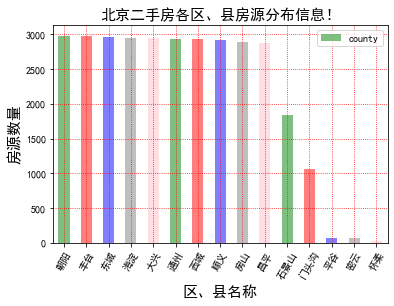

In [52]:

#  图表中文显示
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）
fig, ax=plt.subplots()
 
'''
各区县房源分布情况！！！
'''
df_all['county'].value_counts().plot(kind='bar',color=['green','red','blue','grey','pink'],alpha=0.5)
plt.title('北京二手房各区、县房源分布信息！',fontsize=15)
plt.xlabel('区、县名称',fontsize=15)
plt.ylabel('房源数量',fontsize=15)
plt.grid(linestyle=":", color="r")
plt.xticks(rotation=60)
plt.legend()
plt.show()